# A 15
## a)

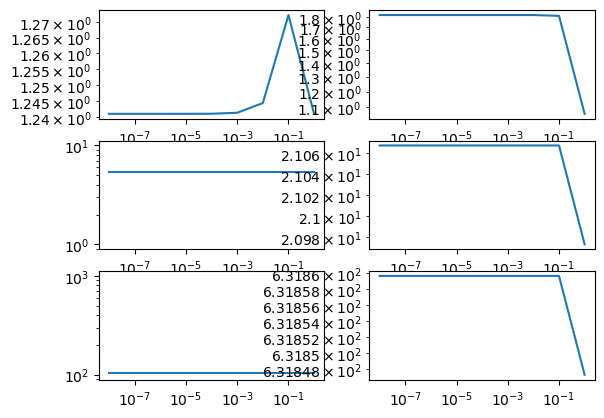

In [7]:
import math

import h5py.h5pl
import numpy as np
import matplotlib.pyplot as plt

x_mid = 1/2


def newton(x_val, x_range):
    s_range = np.cos(x_range)
    n_val = len(x_range)
    b_list = np.zeros(shape=(n_val, n_val))
    b_list[0] = s_range
    ret = b_list[0][0]
    for i in range(1, n_val):
        b_list[i, i:n_val] = np.diff(b_list[i - 1, i - 1:n_val]) / (x_range[i:n_val] - x_range[0:n_val - i])
        ret += b_list[i][i] * np.prod(x_val-x_range[0:i])
    return ret


def interpol(h, n):
    x_range = np.linspace(x_mid-h, x_mid+h, n)
    return math.factorial(n)*newton(x_mid, x_range)


interpol = np.vectorize(interpol, excluded=[1])


fig, ax = plt.subplots(3,2)
ax = ax.flatten()

for n in range(1, 7):
    h_list = []
    for j in range(0,9):
        h_list.append(10**(j - 8))

    if n % 2:
        f_mid = (-1)**(n/2) * np.cos(x_mid)
    else:
        f_mid = (-1)**((n+1)/2) * np.sin(x_mid)

    p_range = interpol(h_list, n)
    error_mid = abs(p_range - f_mid)
    ax[n-1].loglog(h_list, error_mid, label='p')
